In [3]:
# getting necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [4]:
# getting the data from excel
tempos = pd.read_excel('./seaborne2.xlsx')

# arrange it in a dataframe and add average 
bpms = pd.DataFrame(columns=['bpm', 'recording', 'average'])
for c in tempos.columns:
    #print(c)
    tmp = pd.DataFrame({'bpm':tempos[c]})
    tmp['recording'] = c
    tmp['average'] = tempos[c].mean()
    bpms = pd.concat([bpms, tmp])
    #bpms.append(tmp)
    #bpms = tmp


#sort by recording
#bpms = bpms.sort_values(['average', 'recording'])
recordings = list(bpms['recording'].unique())
#bpms.head()
#print(bpms.to_string())

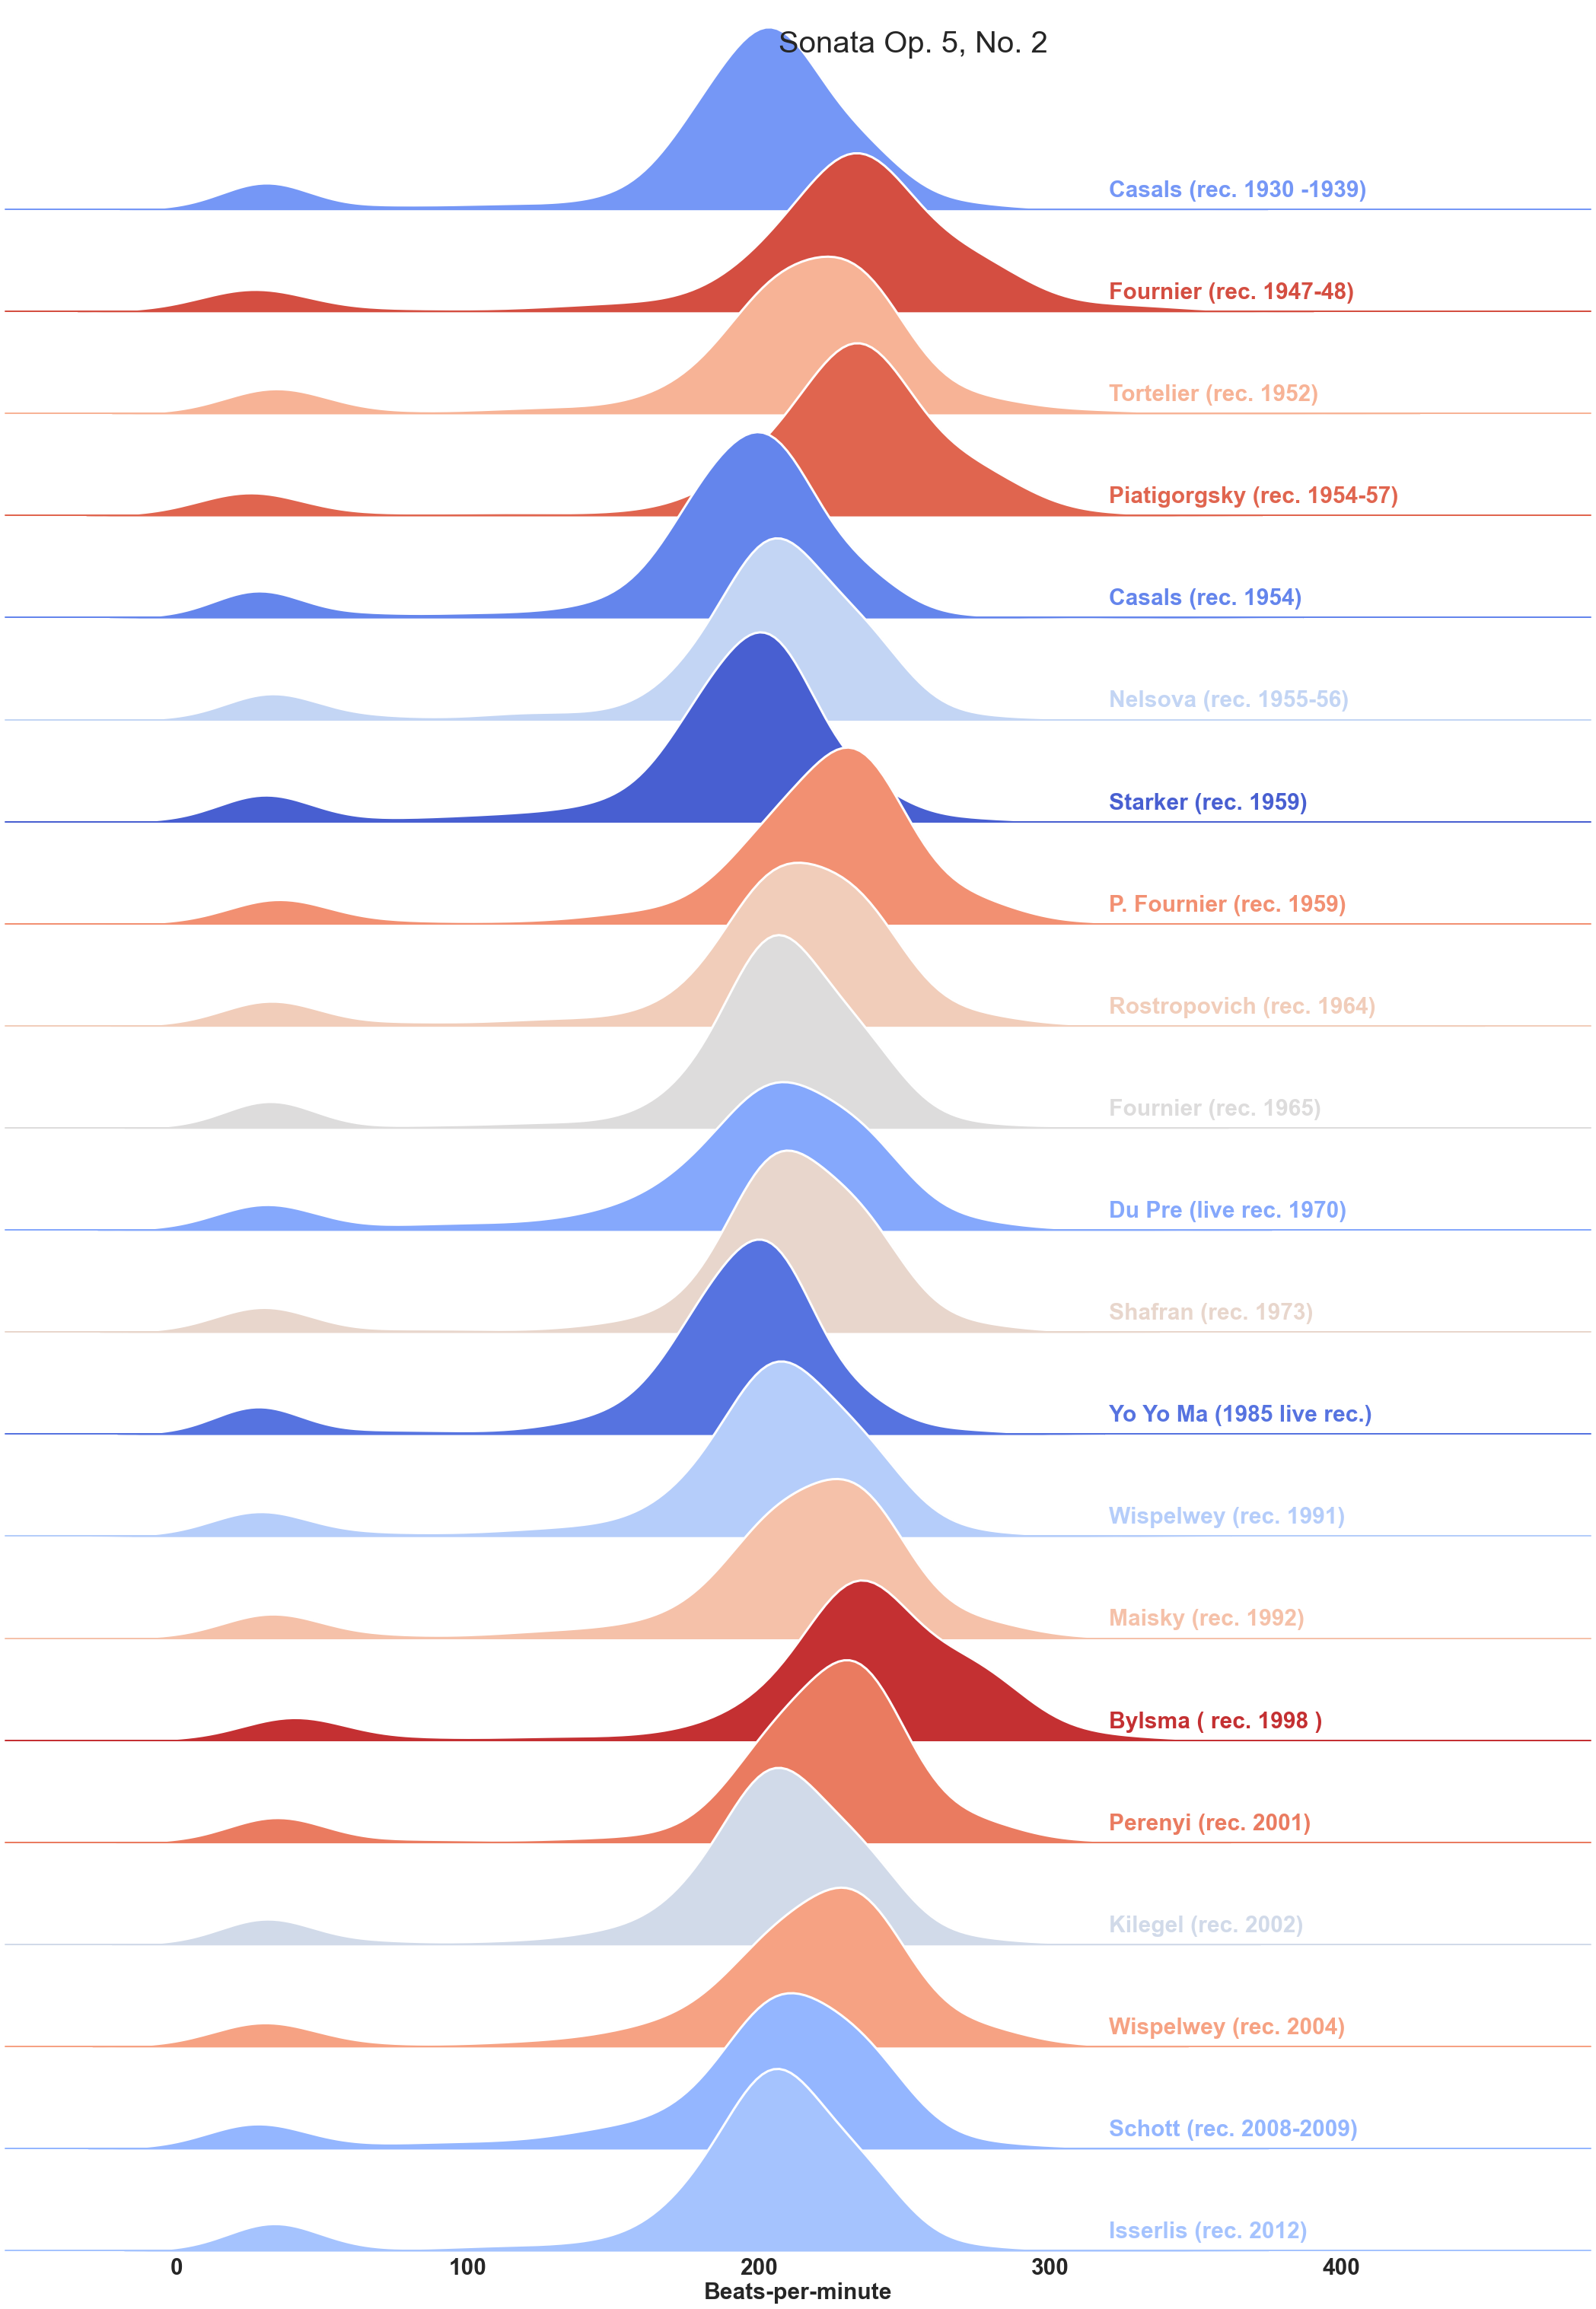

In [15]:
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=len(recordings))

# in the sns.FacetGrid class, the 'hue' argument is the one that is that 
# will be represented by colors with 'palette', we use the average for it
g = sns.FacetGrid(bpms, row='recording', hue='average', aspect=15, height=2, palette=pal)

# then we add the BPM densities kdeplots for each recording
g.map(sns.kdeplot, 'bpm',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'bpm', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=3)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# moving names around
for i, ax in enumerate(g.axes.flat):
    ax.text(320, 0.001, recordings[i],
            fontweight='bold', fontsize=30, ha='left',
            color=ax.lines[-1].get_color())

# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.5)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set_ylabels("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(plt.gca().get_xticklabels(), fontsize=30, fontweight='bold')
plt.xlabel('Beats-per-minute', fontweight='bold', fontsize=30)
g.fig.suptitle('Sonata Op. 5, No. 2',
               ha='left',
               fontsize=40,
               fontweight=40)


plt.show()